<a href="https://colab.research.google.com/github/Munikumarnm/ABC-Classification/blob/main/Product_Classification__ABC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is ABC analysis

 
ABC analysis is product segmentation technique used in inventory management.  
In this technique we categorize products A-calss,B-class & C-calss items.  
A: High value items and the service level is high  
B: Moderate value items  & the service level is medium  
C: Low value items & the service level is low  



# How to do ABC analysis

ABC analysis can be done basis the business requirements.  
We can classify the products basis the sales volume to identify the products which are driving the sales volume.  
We can classify the products basis the sales value to indentify the products which are driving sales revenue.

Data requirements:  
1 year sales data of all the products with quantity sold & revenue generated

Will download the data set from the Kaggle & then will classiffy the products in to ABC category

In [ ]:
# Let's import the libraries required for the analysis
import pandas as pd # Pandas used for Data analysis, Data importing, exporting etc
import numpy as np  # NumPy is used for mathematical operatons  
import seaborn as sns
!pip install inventorize3  # Install this package since it is not available in colab
import inventorize3 as inv  # import the inventorize3 

In [ ]:
# Lets use the e-commerce dataset from kaggle- below is the link for dataset.  
url= 'kaggle datasets download -d carrie1/ecommerce-data'
# Download the dataset form Kaggle & store it in your google drive 

In [30]:
# import the data
raw_data= pd.read_csv("/content/drive/MyDrive/archive.zip",encoding='unicode_escape')  # If you are using any other IDE( Jypyter notebook,Spyder etc..then specify the path of the file)
# there are some utf-8 (non text) in data so we need to use encoding= 'unicode_escape' 

In [32]:
# Will check how data looks like
raw_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [33]:
# Dimesnsion of the data
raw_data.shape

(541909, 8)

In [35]:
# Let us check the types of the columns
raw_data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [36]:
# lets see the data period of the data by checking the min &max of InvoivceDate column
raw_data['InvoiceDate']= pd.to_datetime(raw_data['InvoiceDate'])
print(raw_data['InvoiceDate'].min(), raw_data['InvoiceDate'].max())

2010-12-01 08:26:00 2011-12-09 12:50:00


 From the above result we understood the data is from Dec'2010 to Dec'2011, 1 year data. This is good

In [37]:
# Lets clean the data
data= raw_data.drop_duplicates()
data= data.dropna()
data= data[data['Quantity']>0]

In [38]:
# lets check dimension
data.shape

(392732, 8)

In [39]:
# Lets dropout unnecessary columns
data1= data[['StockCode','Description','Quantity','UnitPrice']]

In [40]:
# Add column revenue
data1['revenue']=data1['Quantity']*data1['UnitPrice']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
data1.head()

,StockCode,Description,Quantity,UnitPrice,revenue
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,71053,WHITE METAL LANTERN,6,3.39,20.34
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [44]:
# Lets summarize the data for SKU's ( Per SKU Total Quantity & Total Revenue)
data2= data1.groupby(['StockCode','Description']).agg(Volume=('Quantity',np.sum),Revenue=('revenue',np.sum)).reset_index()

In [45]:
data2.head()

,StockCode,Description,Volume,Revenue
0,10002,INFLATABLE POLITICAL GLOBE,823,699.55
1,10080,GROOVY CACTUS INFLATABLE,291,114.41
2,10120,DOGGY RUBBER,192,40.32
3,10123C,HEARTS WRAPPING TAPE,5,3.25
4,10124A,SPOTS ON RED BOOKCOVER TAPE,16,6.72


## Let us do the classifcation based on Sales Volume of the items

In [46]:
# Lets classify the products to A B & C categories
data_abc= inv.ABC(data2[['Description','Volume']])

In [47]:
# Lets check the classification
data_abc

,Description,Volume,Percentage,comulative,Category
2602,"PAPER CRAFT , LITTLE BIRDIE",80995,1.567882e-02,0.015679,A
2100,MEDIUM CERAMIC TOP STORAGE JAR,77916,1.508280e-02,0.030762,A
3020,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319,1.051494e-02,0.041277,A
3444,JUMBO BAG RED RETROSPOT,46078,8.919670e-03,0.050196,A
3459,WHITE HANGING HEART T-LIGHT HOLDER,36706,7.105461e-03,0.057302,A
...,...,...,...,...,...
3696,NECKLACE+BRACELET SET PINK DAISY,1,1.935776e-07,0.999999,C
257,SET/3 TALL GLASS CANDLE HOLDER PINK,1,1.935776e-07,0.999999,C
2608,SET OF 3 PINK FLYING DUCKS,1,1.935776e-07,1.000000,C
3686,PINK CRYSTAL GUITAR PHONE CHARM,1,1.935776e-07,1.000000,C


In [48]:
# let us check the count of Categories
data_abc.Category.value_counts()

C    2143
A     879
B     875
Name: Category, dtype: int64

In [49]:
data_summary= data_abc.groupby('Category').agg(Count=('Category',np.count_nonzero),Percentage=('Percentage',np.sum)).reset_index()

In [50]:
data_summary['Percentage']= data_summary['Percentage']*100

In [51]:
data_summary

,Category,Count,Percentage
0,A,879,79.996597
1,B,875,15.000989
2,C,2143,5.002414


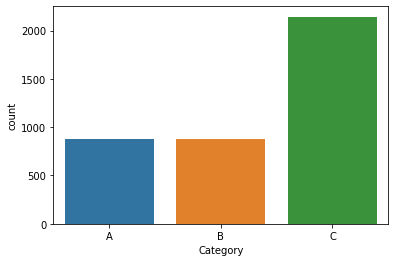

In [52]:
# Lets plot the graph for count of Categories A, B, C
sns.countplot(x='Category',data=data_abc, label=True )

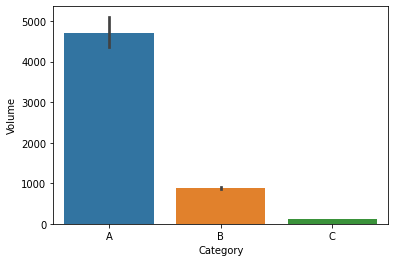

In [53]:
# Lets plot the graph for volume of sales
sns.barplot(x='Category',y='Volume',data=data_abc)

## Classification based on Sales Revenue

In [54]:
data_abc1= inv.ABC(data2[['Description','Revenue']])
# let us check the count of Categories
data_abc1.Category.value_counts()

C    2128
B     960
A     809
Name: Category, dtype: int64